<a href="https://colab.research.google.com/github/mahfuz978/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Mahfuzur_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [13]:
pw_sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
pw_mean = np.mean(pw_sales)
pw_mean

3052.714285714286

In [0]:
def mean(sales_list):
  total = sum(sales_list)
  mean = total/len(sales_list)
  return mean

In [20]:
print(mean(pw_sales))

3052.714285714286


In [17]:
np.std(pw_sales, ddof = 1)

463.0204150595357

In [0]:
def standard_deviation(sales_list):
  variance_result = variance(sales_list)
  std = np.sqrt(variance_result)
  return std

In [31]:
print(standard_deviation(pw_sales))

463.0204150595357


In [18]:
np.var(pw_sales, ddof=1)

214387.90476190473

In [0]:
def variance(sales_list):
  distances = list(map(lambda x: x - mean(sales_list), sales_list))
  squared_distances = list(map(lambda x: x**2, distances))
  variance = sum(squared_distances)/(len(squared_distances)-1)
  return variance

In [23]:
print(variance(pw_sales))

214387.90476190473


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
cx_lw = np.array([127, 80, 105, 92, 120, 115, 93])

In [0]:
import pandas as pd
df = pd.DataFrame({'Last Week Sales':pw_sales})
df['Customers'] = cx_lw

In [50]:
df.head()

,Last Week Sales,Customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [56]:
cov_lw_vs_cx = df['Last Week Sales'].cov(df.Customers)
cov_lw_vs_cx

7604.357142857142

In [54]:
df.cov()

,Last Week Sales,Customers
Last Week Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [69]:
print('Standard deviation for customers who entered the store last week is',(np.std(cx_lw, ddof=1)))

Standard deviation for customers who entered the store last week is 17.057326313123664


In [68]:
print('Standard deviation for Sales for the past week is',  (np.std(pw_sales, ddof = 1)))

Standard deviation for Sales for the past week is 463.0204150595357


In [0]:
std_cx = (np.std(cx_lw, ddof=1))
std_pw = (np.std(pw_sales, ddof = 1))

In [76]:
product_x = std_cx*std_pw
product_x

7897.890309308459

In [78]:
correlation = cov_lw_vs_cx/product_x
correlation

0.9628339778148909

In [79]:
df.corr()

,Last Week Sales,Customers
Last Week Sales,1.000000,0.962834
Customers,0.962834,1.000000


In [0]:
# it tells us that the sales are very closely correlated to the amount of 
# customers that came in the store.

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [86]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [88]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [89]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

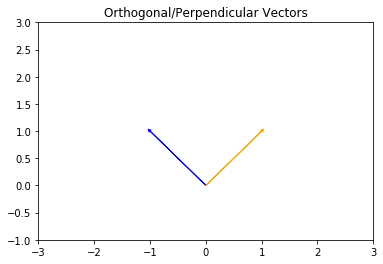

In [99]:
import matplotlib.pyplot as plt

v_1 = [-1, 1]
v_2 = [1, 1]

plt.arrow(0,0, v_1[0], v_1[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal/Perpendicular Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
va = np.array([-5,3,7])
vb = np.array([6,-8,2])

In [102]:
np.dot(va,vb)

-40

In [0]:
# no the vectors are not perpendicular since dot product is not zero, it is -40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
vc = np.array([2,-15,6,20])

In [109]:
np.linalg.norm(vc)**2

665.0

In [111]:
np.dot(vc,vc)

665

In [113]:
np.matmul(vc.T,vc)

665

In [0]:
# These three statements have equivalent values

In [116]:
row_fmt = vc.reshape(-1,1)
row_fmt

array([[  2],
       [-15],
       [  6],
       [ 20]])

In [119]:
np.matmul(vc, row_fmt)[0]

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

In [0]:
vd = np.array([7,12])

\begin{align}
\text{The Identity Matrix: } I_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{align}

\begin{align}
\hat{i}, \hat{j}, \hat{k} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
\text{The Identity Matrix: } I_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{align}

\begin{align}
\hat{i}, \hat{j}, \hat{k} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
vf = np.array([4,12,11,9,2])

In [125]:
length = np.linalg.norm(vf)
length

19.131126469708992

In [124]:
unit_vec = vf/length
unit_vec

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [127]:
len_unit_vec = np.linalg.norm(unit_vec)
len_unit_vec

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

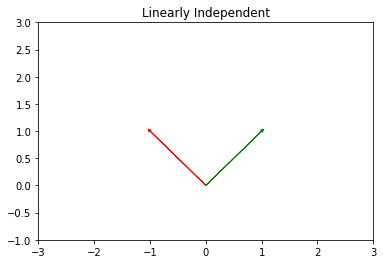

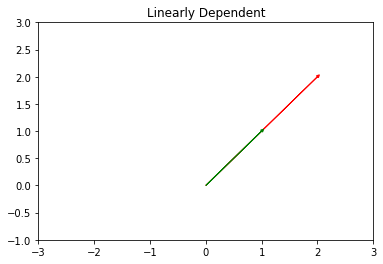

In [128]:
vector_1 = [-1, 1]
vector_2 = [1, 1]


plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Independent")
plt.show()

vector_1 = [2, 2]
vector_2 = [1, 1]


plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Dependent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# all real numbers

In [129]:
np.linalg.matrix_rank([1,2],[4,8])

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [130]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



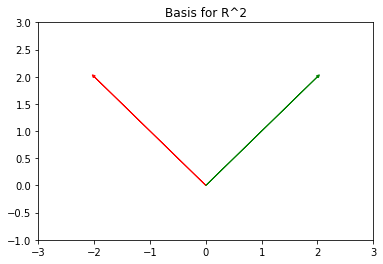

In [132]:
vector_1 = [-2, 2]
vector_2 = [2, 2]


plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

In [133]:
np.linalg.matrix_rank([[2,-2],[2,2]])

2

## 6.2 What does it mean to form a basis?

If two vectors are linearly independent then we know that these vectors can form a linear combination (scaled by some number and then composed together) to form any vector in a certain dimension of space.



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [134]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

## 7.2 What does the rank of a matrix tell us?

It tells us the number of linearly independent vectors in the row space of a matrix and by extension the space of R^n that is spanned by the vectors of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

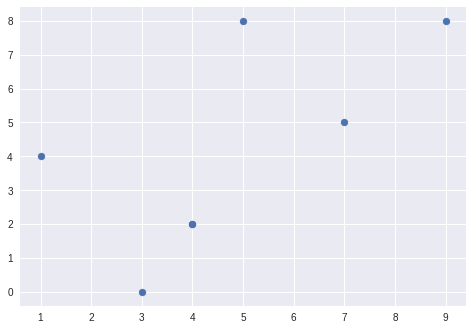

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()